# Logistic Regression in Machine Learning 🤖

As you go along we'll be doing logistic regression, and then we're going to use cross-validation to determine the hyperparameters that will fit models using L1 and L2 regularization.

We'll also be calculating error metrics like **Accuracy**, **Precision**, **Recall**, **F-score**, and **Confusion Matrix**.

And the first thing that we're going to want to do is import the necessary libraries as we've done before.

## Import Libraries 📦

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load and Examine the Dataset 📄

Here we're going to be using the `Human_Activity_Recognition_Using_Smartphones_Data.csv` dataset.

The [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.

In [51]:
data = pd.read_csv('../datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv')
data.head() #this returns top 5 rows of the dataset

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [52]:
# to see how many entries or observation the dataset contains you can simply print its shape
print(data.shape)

(10299, 562)


In [53]:
# to examine how many features are there of each data type(object, float64, int64)
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [54]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data columns are all floats except for the activity label.

In [55]:
# to get descriptive statistics of the dataset
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's breakdown each activity.

In [56]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

They are all relatively balanced.
## Encode the activity label as an integer 🔢

We need to encode the outcome variable `Activity` so that it may be easily parsed by the machine.

A significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

Categorical variables are further divided into two types:
- **Ordinal**: Variables that can be ordered.
       **Ex**- High, Medium, Low
- **Nominal**: Variables that can't be ordered.
       **Ex**- Red, Blue, Green; True, false

The important thing to note here is that we need to preprocess **ordinal** and **nominal** categorical variables differently.

There are two simple techniques to preprocess **ordinal** categorical variables:
- Using map() function
- Using Label Encoder
  
And the best way to handle **nominal** categorical variables is to use One-Hot-Encoding. However, this can significantly increase the number of features and create features that are highly correlated with each other.

In [57]:
# import the class containing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [58]:
# create an instance of the class
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

3333    0
6230    5
4095    0
2258    1
1976    0
Name: Activity, dtype: int32

## Extract Feature and Target Data 🤌

In [59]:
#Separating X and y Variables
feature_cols = data.columns[:-1]
X = data[feature_cols]
y = data.Activity

## Create train and test splits ⚔️

Here we're going to split the data into train and test data sets. This can be done using any method. But we're going to want to consider using the `SKLearn` `StratifiedShuffleSplit` here in order to ensure that we maintain the same ratio of our predictor class, in both our train and test set.

Regardless of the methods used to split the data, you should afterward compare the ratio of classes in both our train and test splits.

In [60]:
# import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

In [61]:
# create a StratifiedShuffleSplit object
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

This outputs a generator object, so we call `next`. `next` Converts the generator objects into an array of indices

In [62]:
# Get the split indexes
train_idx, test_idx = next(strat_shuf_split.split(X, y))

In [63]:
# create the dataframe
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

Compare both the Y train and our Y test, and see if they're fairly similar for each one of the different activities, which are labeled by integers that we want to predict.

In [64]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [65]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

We call normalize equals true within our value counts, as they give us our proportion rather than the actual counts.

## Fitting a Logistic Regression Model 🤖

### Without any Regularization
Here we're going to fit a logistic regression model without any regularization.

In [66]:
# import the class containing LogisticRegression
from sklearn.linear_model import LogisticRegression
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

We see here that we pass as the `solver` `liblinear` , and the only thing you need to know, there's different solvers that optimized for different versions.

We're using here the one versus the rest, which is just trying to predict a certain class versus all the rest, and then another class versus all the rest. So we're going to do that six different times for each one of the six different classes, and `liblinear` is just one of the ways to optimize when we're using one versus the rest.

### With L1 Regularization

We'll import LogisticRegressionCV which will allow us to loop through many different hyperparameters.

In [68]:
from sklearn.linear_model import LogisticRegressionCV
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

`Cs` is similar to lamda except that it is inverse here.

We have `cv` equal to 4 so having four different holdout sets, to see which values of `C` will optimize best on some holdout set.

### With L2 Regularization
This one is little bit faster.

In [69]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

## Predictions and Error Metrics 💯

We'll be doing the **Accuracy**, **Precision**, **Recall**, **F-Score**, and **Confusion Matrix**. And also certain scoring such as the **ROC curve**.

So, we'll start to predict each one of our different labels, as well as start storing the probabilities.

> 💡 The ROC curve will generally do better for data with balanced classes. The precision-recall curve will generally be better suited for data with imbalanced classes

### Prediction

In [70]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    y_prob.append(pd.DataFrame(mod.predict_proba(X_test), columns=coeff_label))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [71]:
y_prob.head()

lr                                                                    \
          0             1             2             3         4             5   
0  0.000034  1.683457e-04  5.675968e-04  9.989388e-01  0.000006  2.845351e-04   
1  0.000037  3.211711e-07  4.237865e-06  1.424779e-04  0.011650  9.881654e-01   
2  0.000036  4.352764e-03  2.962603e-06  9.875917e-01  0.005011  3.006537e-03   
3  0.000223  9.813812e-01  1.838389e-02  1.419839e-07  0.000012  1.288315e-12   
4  0.998277  1.717715e-03  3.008377e-09  2.088934e-07  0.000005  1.393959e-10   

         l1                                                          \
          0             1             2             3             4   
0  0.000003  5.422320e-06  1.042272e-03  9.989489e-01  5.512089e-10   
1  0.000005  1.028758e-08  1.119377e-07  3.986667e-05  4.113918e-04   
2  0.000001  3.561847e-03  2.197571e-07  9.956539e-01  7.769263e-04   
3  0.000002  9.991736e-01  8.241011e-04  1.925311e-11  2.170565e-10   
4  0.999919  8.115467e-05  3.188849e-14  3.145901e-10  1.402074e-10   

                           l2                                            \
              5             0             1             2             3   
0  4.816534e-08  1.236823e-07  1.979939e-08  2.312070e-06  9.999975e-01   
1  9.995439e-01  2.671103e-07  5.230459e-14  3.237063e-12  1.038200e-09   
2  5.874342e-06  1.838199e-07  6.789225e-05  8.462633e-12  9.996967e-01   
3  1.299298e-22  1.322405e-07  9.998647e-01  1.351713e-04  9.000201e-17   
4  4.054175e-20  9.999973e-01  2.666167e-06  9.843973e-22  9.889195e-16   

                               
              4             5  
0  3.829115e-09  3.607216e-12  
1  5.224579e-04  9.994773e-01  
2  2.352370e-04  2.274678e-09  
3  2.218581e-09  1.013162e-38  
4  1.708532e-09  2.981961e-34

### Calculating Error Metrics

In [72]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              y_prob[lab], 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

,lr,l1,l2
precision,0.984144,0.983514,0.984477
recall,0.984142,0.983495,0.984466
fscore,0.984143,0.983492,0.984464
accuracy,0.984142,0.983495,0.984466
auc,0.999338,0.999369,0.999196


### Confusion Matrix for each model

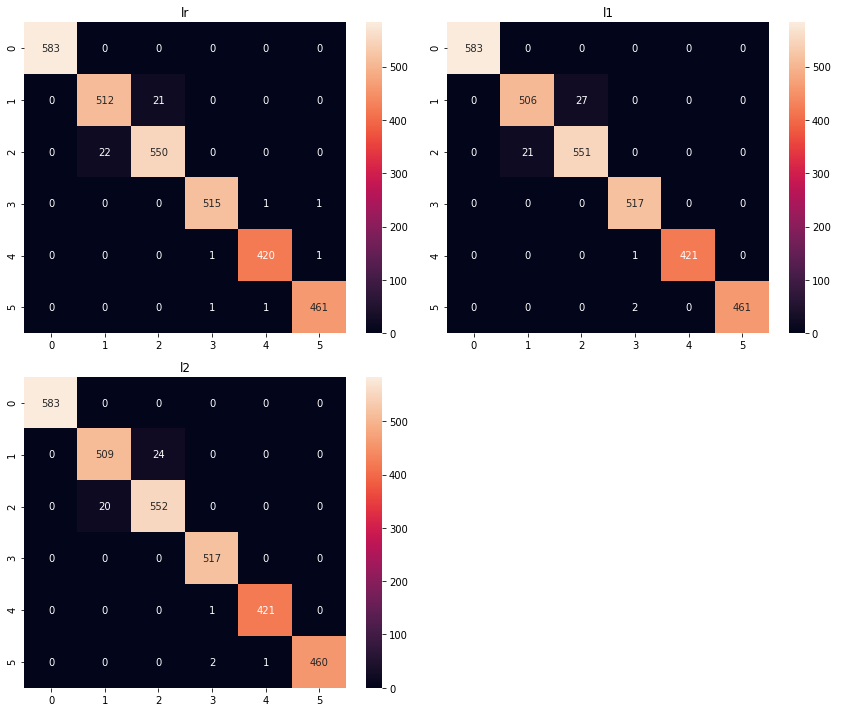

In [74]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

# Shutting of the last axis as we have only three model so we need three plot
axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d')
    ax.set(title=lab)
    
plt.tight_layout()

Across the rows are going to be the actual classes, whereas across the different columns are going to be what was predicted.

And we can see which ones are getting confused. Laying is 0, sitting is 1, standing is 2. So it seems that sitting and standing are getting confused with one another.